In [2]:
from utils import *

In [3]:
cwd = pathlib.Path.cwd()
project_cwd = cwd.parent

df = pd.read_csv(f'{project_cwd}/data/heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


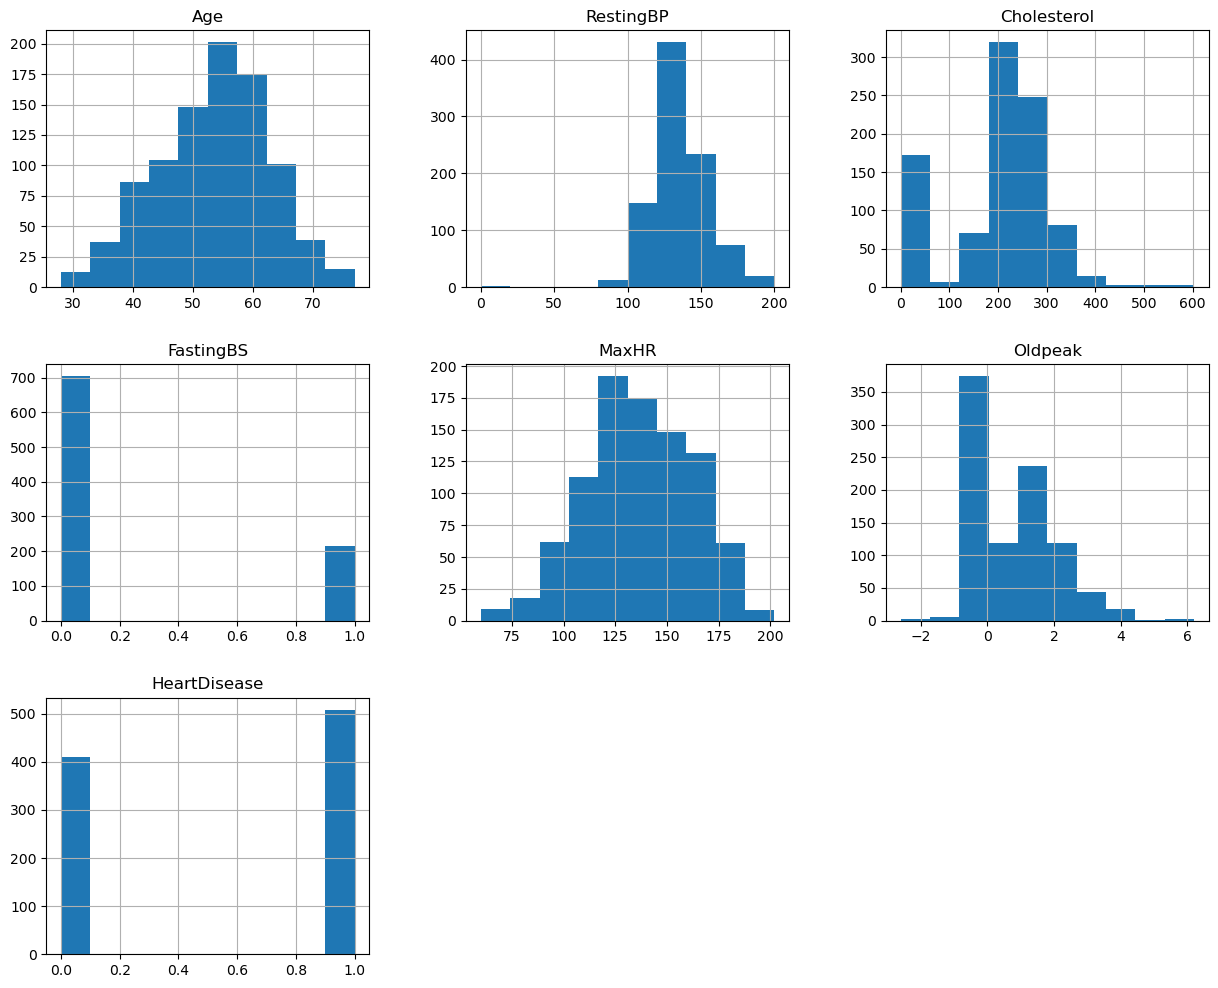

In [4]:
df.hist(figsize=(15,12));

In [5]:
# Check for nan values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [7]:
data = df.copy()

col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [8]:
# Converting object columns to numeric - "LabelEncoder"

# instanciar encoder
lb = LabelEncoder()

objList = data.select_dtypes(include = "object").columns

for obj in objList:
    # Stampo i valori unici prima dell'encoding
    print(f"\n======== {obj} ========")
    print("Before encoding:")
    unique_values = data[obj].unique()
    print(unique_values)

    
    data[obj] = lb.fit_transform(data[obj].astype(str))

    # Stampo il mapping tra valori originali e valori codificati
    print("\nMAPPING of the encoding:")
    for i, original_value in enumerate(lb.classes_):
        encoded_value = lb.transform([original_value])[0]
        print(f"'{original_value}' → {encoded_value}")
    
    # Stampo i valori unici dopo l'encoding
    print("\nAfter encoding:")
    print(data[obj].unique())
    
    print(f"==========================")


======== Sex ========
Before encoding:
['M' 'F']

MAPPING of the encoding:
'F' → 0
'M' → 1

After encoding:
[1 0]

======== ChestPainType ========
Before encoding:
['ATA' 'NAP' 'ASY' 'TA']

MAPPING of the encoding:
'ASY' → 0
'ATA' → 1
'NAP' → 2
'TA' → 3

After encoding:
[1 2 0 3]

======== RestingECG ========
Before encoding:
['Normal' 'ST' 'LVH']

MAPPING of the encoding:
'LVH' → 0
'Normal' → 1
'ST' → 2

After encoding:
[1 2 0]

======== ExerciseAngina ========
Before encoding:
['N' 'Y']

MAPPING of the encoding:
'N' → 0
'Y' → 1

After encoding:
[0 1]

======== ST_Slope ========
Before encoding:
['Up' 'Flat' 'Down']

MAPPING of the encoding:
'Down' → 0
'Flat' → 1
'Up' → 2

After encoding:
[2 1 0]


### Binning of the numerical data

In [9]:
# Converting numeric columns to bins
labels = [0, 1, 2]

# --- 1. Categorize Age ---
age_bins = [-float('inf'), 44, 60, float('inf')] # Bins for <44, 45-60, >60

data['Age_Category'] = pd.cut(data['Age'], bins=age_bins, labels=labels, right=True)

print(data[['Age', 'Age_Category']].head())
print("- " * 20)

# --- 2. Categorize RestingBP ---
bp_bins = [-np.inf, 119, 139, np.inf] # Bins for <120, 120-139, >=140

data['RestingBP_Category'] = pd.cut(data['RestingBP'], bins=bp_bins, labels=labels, right=True)

print(data[['RestingBP', 'RestingBP_Category']].head())
print("- " * 20)

# --- 3. Categorize Cholesterol ---
chol_bins = [-1, 0, 199, 239, np.inf] # Bins for 0, 1-199, 200-239, >=240
chol_labels = [0, 1, 2, 3]

data['Cholesterol_Category'] = pd.cut(data['Cholesterol'].fillna(-1), bins=chol_bins, labels=chol_labels, right=True)
print(data[['Cholesterol', 'Cholesterol_Category']].head())
print("- " * 20)

# --- 4. Categorize MaxHR ---
data['MaxHR_Category'] = pd.qcut(data['MaxHR'], q=3, labels=labels, duplicates='drop')

print(data[['MaxHR', 'MaxHR_Category']].head())
print("- " * 20)

# --- 5. Categorize Oldpeak ---
oldpeak_bins = [-np.inf, 0.99, 2.5, np.inf] # Bins for <1.0, 1.0-2.5, >2.5

data['Oldpeak_Category'] = pd.cut(data['Oldpeak'], bins=oldpeak_bins, labels=labels, right=True)

print(data[['Oldpeak', 'Oldpeak_Category']].head())

data.drop(numerical_features, axis=1, inplace=True)

   Age Age_Category
0   40            0
1   49            1
2   37            0
3   48            1
4   54            1
- - - - - - - - - - - - - - - - - - - - 
   RestingBP RestingBP_Category
0        140                  2
1        160                  2
2        130                  1
3        138                  1
4        150                  2
- - - - - - - - - - - - - - - - - - - - 
   Cholesterol Cholesterol_Category
0          289                    3
1          180                    1
2          283                    3
3          214                    2
4          195                    1
- - - - - - - - - - - - - - - - - - - - 
   MaxHR MaxHR_Category
0    172              2
1    156              2
2     98              0
3    108              0
4    122              0
- - - - - - - - - - - - - - - - - - - - 
   Oldpeak Oldpeak_Category
0      0.0                0
1      1.0                1
2      0.0                0
3      1.5                1
4      0.0              

In [10]:
#df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


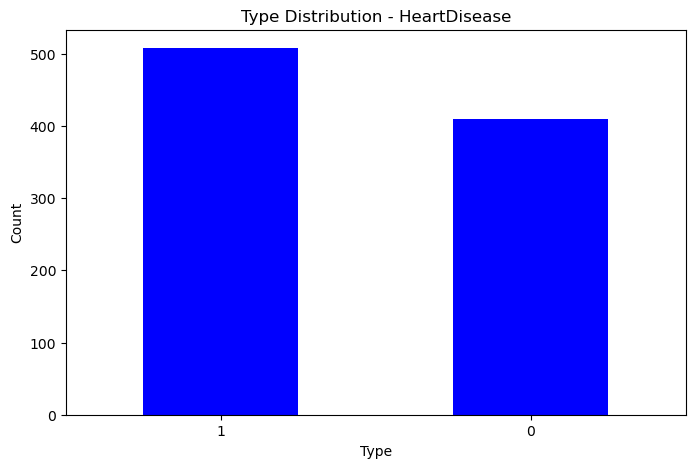

In [11]:
type_counts = data['HeartDisease'].value_counts()

# Create a bar plot for the type distribution
plt.figure(figsize=(8, 5))
type_counts.plot(kind='bar', color='blue')
plt.title('Type Distribution - HeartDisease')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
hd_corr = data.corr()["HeartDisease"].sort_values(ascending=False)
print(hd_corr)
#[1: heart disease, 0: Normal]

HeartDisease            1.000000
ExerciseAngina          0.494282
Oldpeak_Category        0.423730
Sex                     0.305445
FastingBS               0.267291
Age_Category            0.263913
RestingBP_Category      0.077988
RestingECG              0.057384
Cholesterol_Category   -0.192774
ChestPainType          -0.386828
MaxHR_Category         -0.399085
ST_Slope               -0.558771
Name: HeartDisease, dtype: float64


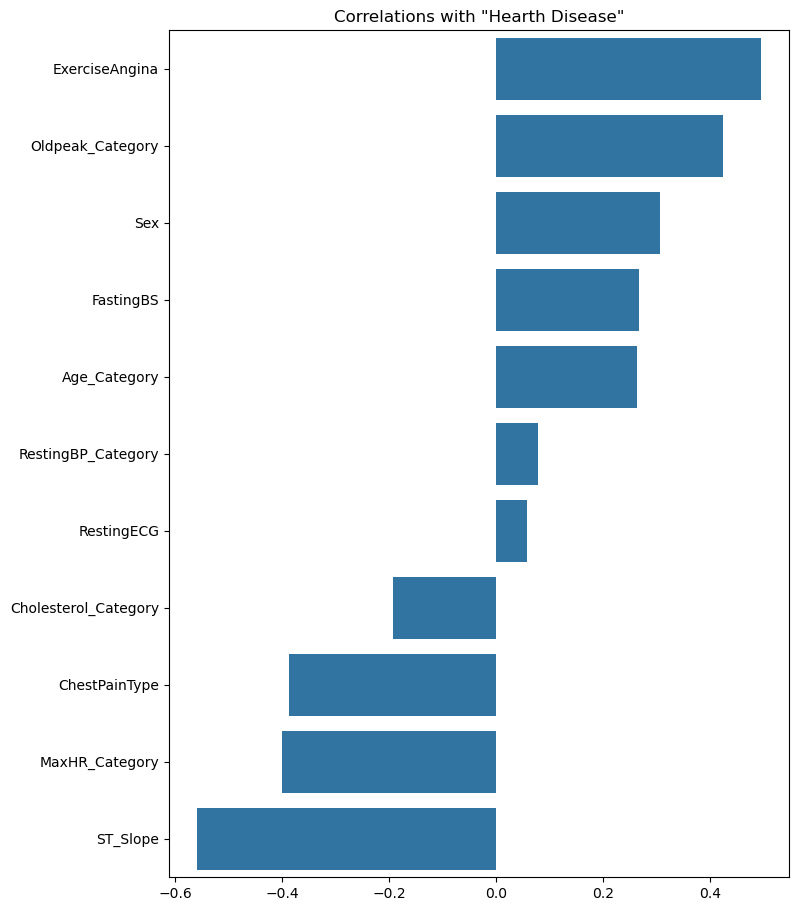

In [13]:
# Correlations with "Status"

limit = -1.0

indices = hd_corr.index
labels = []
corr = []
for i in range(1, len(indices)):
    if hd_corr[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(hd_corr[i])


fig, ax = plt.subplots(figsize=(8,11))
sns.barplot(x=corr, y=labels, ax=ax)
plt.title('Correlations with "Hearth Disease"')
plt.show()


### Model Construction

The graph is acyclic: True


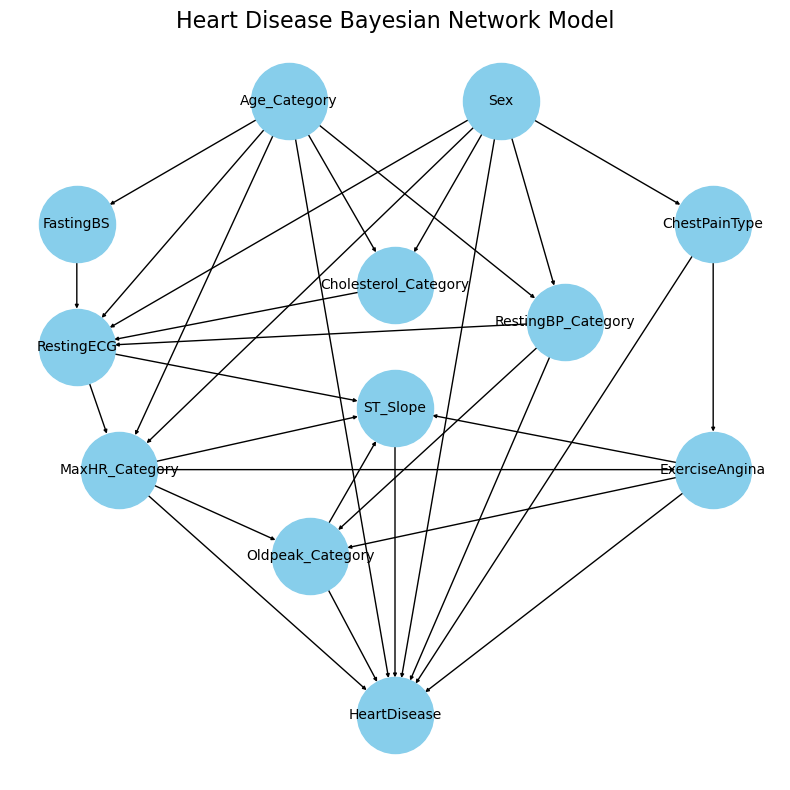

In [14]:
# Define the "Custom" Bayesian Network structure


heart_disease_model = BayesianNetwork([
    ('Age_Category', 'RestingBP_Category'), ('Age_Category', 'Cholesterol_Category'), ('Age_Category', 'MaxHR_Category'),
    ('Age_Category', 'RestingECG'), ('Age_Category', 'FastingBS'), ('Age_Category', 'HeartDisease'), 
    ('Sex', 'Cholesterol_Category'),('Sex', 'MaxHR_Category'), ('Sex', 'RestingECG'),  ('Sex', 'RestingBP_Category'), ('Sex', 'ChestPainType'), ('Sex', 'HeartDisease'),
    ('FastingBS', 'RestingECG'),
    ('Cholesterol_Category', 'RestingECG'),
    ('RestingBP_Category', 'RestingECG'), ('RestingBP_Category', 'Oldpeak_Category'), ('RestingBP_Category', 'HeartDisease'),
    ('RestingECG', 'ST_Slope'), ('RestingECG', 'MaxHR_Category'),
    ('MaxHR_Category', 'ST_Slope'), ('MaxHR_Category', 'ExerciseAngina'), ('MaxHR_Category', 'Oldpeak_Category'), ('MaxHR_Category', 'HeartDisease'), 
    ('ChestPainType', 'ExerciseAngina'), ('ChestPainType', 'HeartDisease'),
    ('ExerciseAngina', 'ST_Slope'), ('ExerciseAngina', 'Oldpeak_Category'), ('ExerciseAngina', 'HeartDisease'),
    ('Oldpeak_Category', 'ST_Slope'), ('Oldpeak_Category', 'HeartDisease'),
    ('ST_Slope', 'HeartDisease')
])

pos = {'Age_Category': [0.75, -0.5], 'Sex': [1.25, -0.5],
       'FastingBS': [0.25, -1.], 'Cholesterol_Category': [1., -1.25], 'ChestPainType': [1.75,  -1],
       'RestingBP_Category': [1.40, -1.40], 'RestingECG': [0.25, -1.5],
       'MaxHR_Category': [0.35,  -2],
       'ExerciseAngina': [1.75, -2], 'Oldpeak_Category': [0.80, -2.35], 'ST_Slope': [1.,  -1.75], 
       'HeartDisease': [1, -3]}

is_acyclic = nx.is_directed_acyclic_graph(heart_disease_model)
print(f"The graph is acyclic: {is_acyclic}")

# --- Visualization ---
# Create a figure and axes for the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

nx.draw_networkx(heart_disease_model, pos=pos, ax=ax, node_size=3000,
                 node_color='skyblue', font_size=10, arrows=True, arrowsize=5)

# Set the title and save the figure
ax.set_title('Heart Disease Bayesian Network Model', fontsize=16)
plt.axis('off') # Turn off the axis box
fig.tight_layout() # Adjust layout
plt.savefig(f"{project_cwd}/out/custom_bn.png")


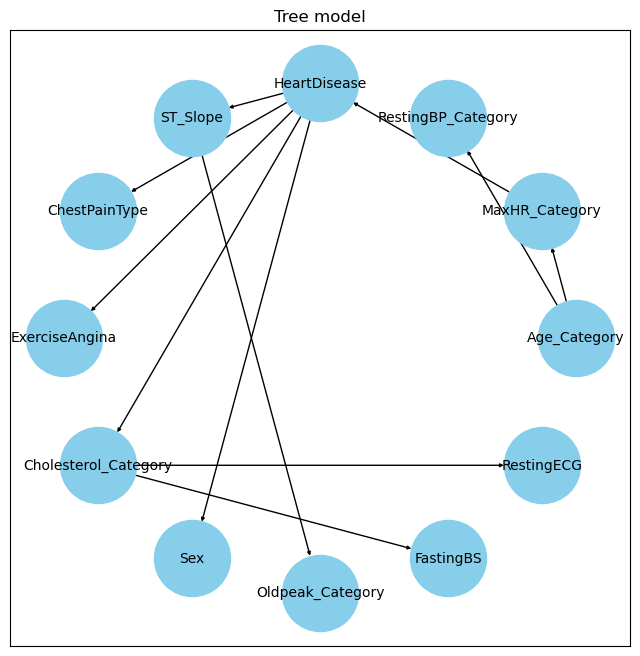

In [15]:
ts = TreeSearch(data=data, root_node='Age_Category' ) # Age_Category - Sex
tree_model = ts.estimate(show_progress=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
nx.draw_networkx(tree_model, pos=nx.drawing.layout.circular_layout(tree_model), ax=ax, node_size=3000,
                     node_color='skyblue', font_size=10, arrows=True, arrowsize=5)

plt.savefig(f"{project_cwd}/out/tree.png")
ax.set_title('Tree model')
tree_model = BayesianNetwork(tree_model.edges())

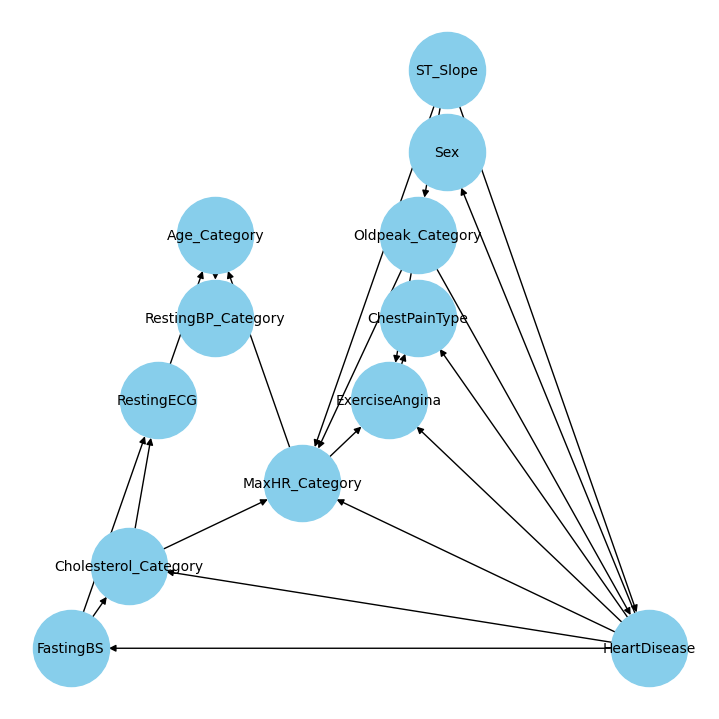

In [16]:
scoring_method = K2Score(data=data)
hc = HillClimbSearch(data=data)
hc_k2score_model = hc.estimate(scoring_method=scoring_method,
                               max_indegree=4, max_iter=int(1e4), show_progress=False)

fig = plt.figure(figsize=(7, 7))
nx.draw(hc_k2score_model, with_labels=True, arrowsize=10, node_size=3000, node_color='skyblue', font_size=10, pos=nx.planar_layout(hc_k2score_model))
plt.savefig(f"{project_cwd}/out/hc_k2score_model.png")

ax.set_title('HC base model')
hc_k2score_model = BayesianNetwork(hc_k2score_model.edges())

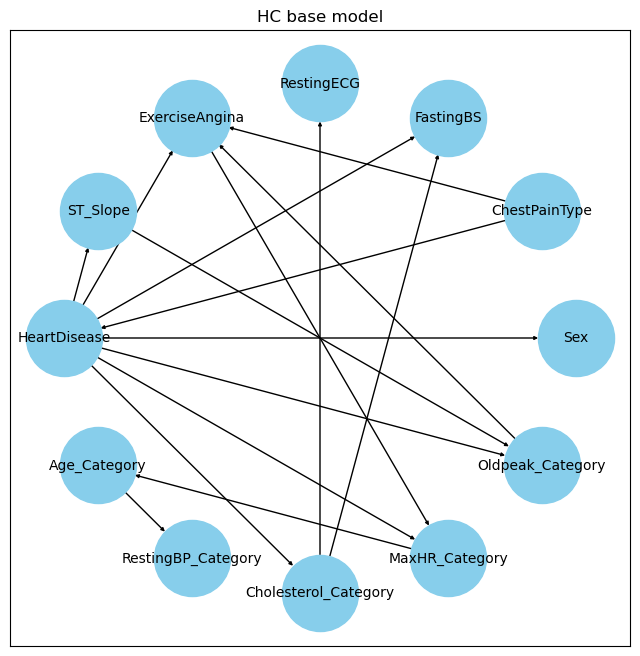

In [17]:
scorer = BDeuScore(data=data)
hc = HillClimbSearch(data=data)
hc_bdscore_model = hc.estimate(scoring_method=scorer, max_iter=int(1e4), show_progress=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
nx.draw_networkx(hc_bdscore_model, pos=nx.drawing.layout.circular_layout(hc_bdscore_model), ax=ax, node_size=3000,
                     node_color='skyblue', font_size=10, arrows=True, arrowsize=5)
plt.savefig(f"{project_cwd}/out/hc_bdscore_model.png")

ax.set_title('HC base model')
hc_bdscore_model = BayesianNetwork(hc_bdscore_model.edges())

In [18]:
models = [('custom', heart_disease_model), ('tree', tree_model), 
          ('hc k2score', hc_k2score_model), ('hc bdscore', hc_bdscore_model)]
for name, model in models:
    print(f'Computing CPD (CPT) for {name} model')   # CPT per le variabili discrete, CPD è il concetto generale: descrive la dipendenza probabilistica P(Nodo | Genitori).
    model.fit(data, estimator=MaximumLikelihoodEstimator)
    for cpd in model.get_cpds():
        print(cpd, "\n")
    print("- " * 40)

Computing CPD (CPT) for custom model
+-----------------+----------+
| Age_Category(0) | 0.1939   |
+-----------------+----------+
| Age_Category(1) | 0.565359 |
+-----------------+----------+
| Age_Category(2) | 0.240741 |
+-----------------+----------+ 

+-----------------------+-----+---------------------+
| Age_Category          | ... | Age_Category(2)     |
+-----------------------+-----+---------------------+
| Sex                   | ... | Sex(1)              |
+-----------------------+-----+---------------------+
| RestingBP_Category(0) | ... | 0.11931818181818182 |
+-----------------------+-----+---------------------+
| RestingBP_Category(1) | ... | 0.3977272727272727  |
+-----------------------+-----+---------------------+
| RestingBP_Category(2) | ... | 0.48295454545454547 |
+-----------------------+-----+---------------------+ 

+-------------------------+-----+---------------------+
| Age_Category            | ... | Age_Category(2)     |
+-------------------------+-----+---

##### Check the consistency of the models

In [19]:
for name, model in models:
    is_consistent = model.check_model()
    print(f"The graph {name} is consistent: {is_consistent}")

The graph custom is consistent: True
The graph tree is consistent: True
The graph hc k2score is consistent: True
The graph hc bdscore is consistent: True


In [20]:
nodes = ['Sex', 'Age_Category', 'FastingBS', 'MaxHR_Category', 'ST_Slope', 'Cholesterol_Category', 'HeartDisease']
print('Considering nodes:', nodes)
for name, model in models:
    print(f'Analyzing model: {name}')
    print(f'The total number of valid independence assertions is {len(model.get_independencies().get_assertions())}')
    print(f'Local semantics of the current model:\n{model.local_independencies(nodes)}')
    print('Checking Markov blankets')
    for node in nodes:
        print(f'The Markov blanket of node {node} is {model.get_markov_blanket(node)}')
    print()

Considering nodes: ['Sex', 'Age_Category', 'FastingBS', 'MaxHR_Category', 'ST_Slope', 'Cholesterol_Category', 'HeartDisease']
Analyzing model: custom
The total number of valid independence assertions is 2822
Local semantics of the current model:
(Sex ⟂ FastingBS, Age_Category)
(Age_Category ⟂ Sex, ChestPainType)
(FastingBS ⟂ RestingBP_Category, Sex, ChestPainType, Cholesterol_Category | Age_Category)
(MaxHR_Category ⟂ RestingBP_Category, FastingBS, ChestPainType, Cholesterol_Category | Sex, RestingECG, Age_Category)
(ST_Slope ⟂ FastingBS, Cholesterol_Category, RestingBP_Category, Sex, Age_Category, ChestPainType | MaxHR_Category, ExerciseAngina, RestingECG, Oldpeak_Category)
(Cholesterol_Category ⟂ RestingBP_Category, FastingBS, ChestPainType | Sex, Age_Category)
(HeartDisease ⟂ FastingBS, RestingECG, Cholesterol_Category | ST_Slope, ChestPainType, MaxHR_Category, Oldpeak_Category, RestingBP_Category, Sex, ExerciseAngina, Age_Category)
Checking Markov blankets
The Markov blanket of nod

In [21]:
inferences = [(name, VariableElimination(model)) for name, model in models]

Performing inference for model: custom
Performing inference for model: tree
Performing inference for model: hc k2score
Performing inference for model: hc bdscore


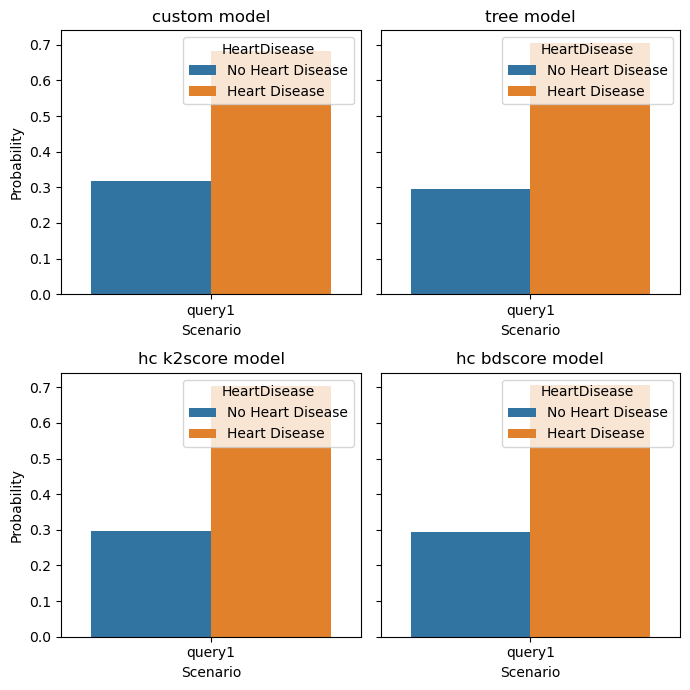

In [22]:
# Query 1: P(HeartDisease | Age_Category=2 (Senior), Sex=1 (Male))

evidence = {'Age_Category': 2, 'Sex': 1}
results_query1 = {}
for name, inference in inferences:
    results_query1[name] = {}
    print(f"Performing inference for model: {name}")
    results_query1[name]['query1'] = inference.query(["HeartDisease"], evidence, show_progress=False).values

plot_values(results_query1, label_map={0: 'No Heart Disease', 1: 'Heart Disease'})

Scenarios: probability following the pairs of Age_Category/ChestPainType 
[(0, 0), (0, 1), (0, 2), (0, 3)]
Performing inference for model: custom
Performing inference for model: tree
Performing inference for model: hc k2score
Performing inference for model: hc bdscore


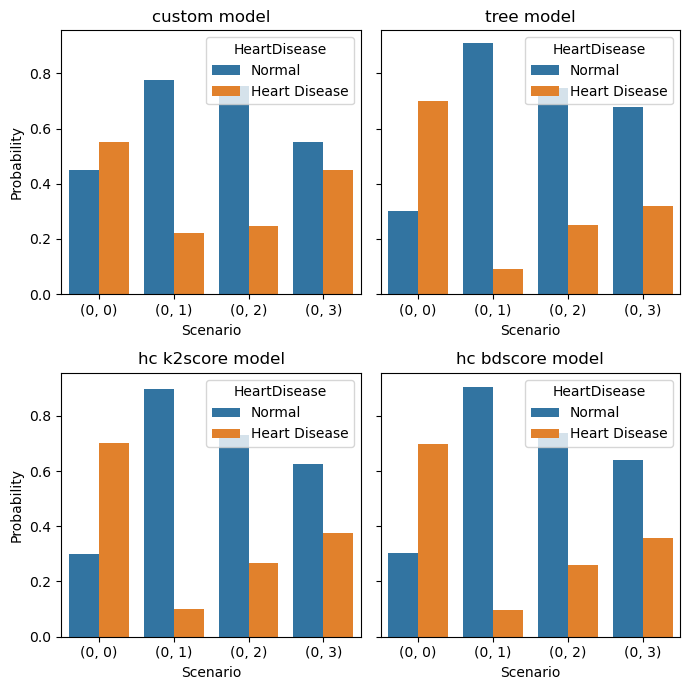

In [23]:
age = 0
values = [(age, 0), (age, 1), (age, 2), (age, 3)] #'ASY' → 0 'ATA' → 1 'NAP' → 2 'TA' → 3
answer_values = {}
print(f"Scenarios: probability following the pairs of Age_Category/ChestPainType \n{values}")
for name, inference in inferences:
    print(f"Performing inference for model: {name}")
    answer_values[name] = {}
    for age, chest_pain_type in values:
        evidence = {"Age_Category": age, "ChestPainType": chest_pain_type}
        answer_values[name][(age, chest_pain_type)] = inference.query(["HeartDisease"], evidence, show_progress=False).values
plot_values(answer_values, label_map={0: 'Normal', 1: 'Heart Disease'})

Which Chest pain type cause a high risk of Heart disease in an male Adult patient?

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

Scenario: Chest pain type of an old male man
Possible pain type: [0, 1, 2, 3]
Performing inference for model: custom
Performing inference for model: tree
Performing inference for model: hc k2score
Performing inference for model: hc bdscore


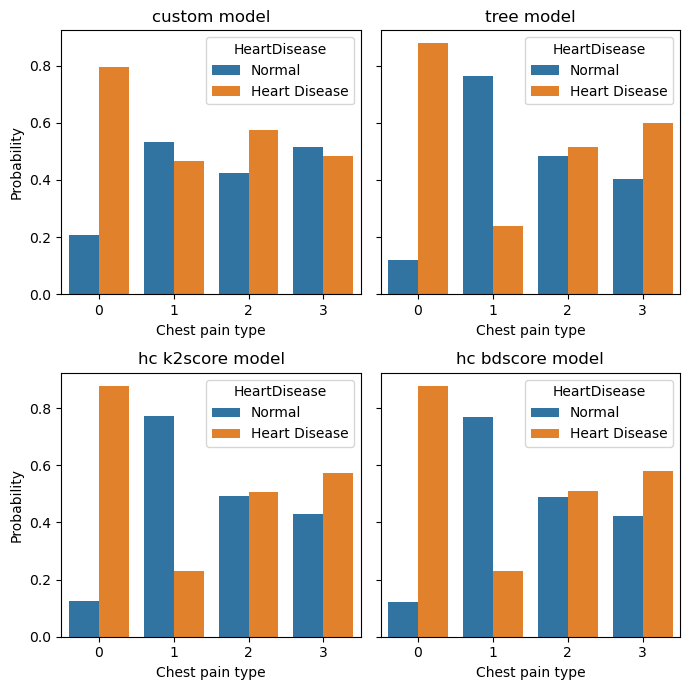

In [24]:
pain_types = [0, 1, 2, 3] # [ASY: 0, ATA: 1, NAP: 2, TA: 3]
answer_pain_types = {}
evidence = {"Age_Category": 2, "Sex": 1}
print(f"Scenario: Chest pain type of an old male man")
print(f"Possible pain type: {pain_types}")
for name, inference in inferences:
    answer_pain_types[name] = {}
    print(f"Performing inference for model: {name}")
    for pain_type in pain_types:
        evidence['ChestPainType'] = pain_type
        answer_pain_types[name][pain_type] = inference.query(["HeartDisease"], evidence, show_progress=False).values

plot_values(answer_pain_types, label_map={0: 'Normal', 1: 'Heart Disease'}, x='Chest pain type', state_col='HeartDisease', y='Probability')
            


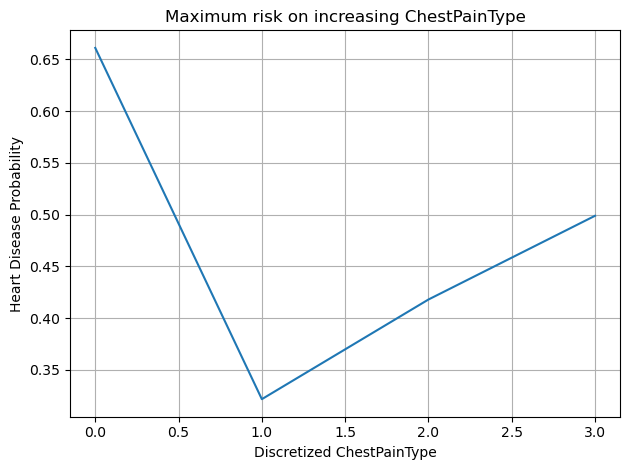

In [25]:
from pgmpy.factors.discrete import State

exact_inference = inferences[0][1] #custom model
illness = "ChestPainType"

max_disease = []
for t in range(data[illness].max() + 1):
    evidence = [State(illness, t)]
    prob = exact_inference.query(["HeartDisease"], evidence=dict(evidence), show_progress=False)
    max_disease.append(prob.values[-1])

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(range(len(max_disease)), max_disease)
plt.title(f"Maximum risk on increasing {illness}")
plt.xlabel(f"Discretized {illness}")
plt.ylabel("Heart Disease Probability")
plt.grid()
plt.tight_layout()
plt.savefig(f"{project_cwd}/out/inc_temp.png")
plt.show()

### Exact and Approximate Evidence

### Error Analysis

### Performance test